In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mnist = input_data.read_data_sets("/JupyterNotebook/Machine Learning/CNN Demo", one_hot = True)

Extracting /JupyterNotebook/Machine Learning/CNN Demo\train-images-idx3-ubyte.gz
Extracting /JupyterNotebook/Machine Learning/CNN Demo\train-labels-idx1-ubyte.gz
Extracting /JupyterNotebook/Machine Learning/CNN Demo\t10k-images-idx3-ubyte.gz
Extracting /JupyterNotebook/Machine Learning/CNN Demo\t10k-labels-idx1-ubyte.gz


In [3]:
# 初始化 权重 与 偏置
def weight_variable(shape, Name=None):
    '''
        shape: 1-D 整型tensor 或python array
    '''
    # truncated_normal 生成截断正态分布随机数 即 所有随机数均落在(\mu+-2sigma)内
    
    initial = tf.truncated_normal(shape, stddev=0.1)
    if Name==None:
        return tf.Variable(initial)
    else:
        return tf.Variable(initial, name=Name)

def bias_variable(shape, Name=None):
    if Name == None:
        return tf.Variable(tf.ones(shape)/10)
    else:
        return tf.Variable(tf.ones(shape)/10, name = Name)
    

In [4]:
def conv2d(x,W,Name=None):
    if Name==None:
        return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME')
    else:
        return tf.nn.conv2d(x,W,strides=[1,1,1,1], padding='SAME', name = Name)

def max_pool_2x2(x,Name=None):
    if Name==None:
        return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    else:
        return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME', name=Name)

In [5]:
# x 特征
# y 真实label
x = tf.placeholder(tf.float32, [None, 784], name='x')
y = tf.placeholder(tf.float32, [None, 10], name='y')
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [6]:
# 定义卷积层

W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [7]:
# 全连接层 
# 由于经过两次 2*2池化 因此图像长宽变为 1/4 即7*7 
# 而由于有64个输出通道，因此输入节点数为 7*7*64
# 设第一层隐含节点数为 1024
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
# 将池化结果展开
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.matmul(h_pool2_flat, W_fc1) + b_fc1
h_fc1 = tf.nn.relu(h_fc1)

# dropout 层
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# softmax 层
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
h_fc2 = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
y_conv = tf.nn.softmax(h_fc2)

In [8]:
# 损失函数
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=h_fc2))
train = tf.train.AdamOptimizer(1e-2).minimize(loss)

In [9]:
# 准确率
correct_prediction = tf.equal(tf.argmax(y_conv, axis=1), tf.argmax(y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='Accuracy')

In [10]:
# 保存模型
epoches = 200
saver = tf.train.Saver()
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    loss_hist = [ ]
    accuracy_hist = []
    for i in range(1,epoches+1):
        batch = mnist.train.next_batch(50)
        
        if i % 10 == 0:    
            print("step %d, train accuracy %f"% (i, train_accuracy))
            
        train_accuracy = sess.run(accuracy, feed_dict={x:batch[0], y:batch[1], keep_prob:1})
        accuracy_hist.append(train_accuracy)
        loss_value, _ = sess.run([loss, train], feed_dict={x:batch[0], y:batch[1], keep_prob:0.5})
        loss_hist.append(loss_value)
        
        if i%100==0:
            saver.save(sess, "/JupyterNotebook/Machine Learning/CNN Demo/Result")

step 10, train accuracy 0.120000
step 20, train accuracy 0.220000
step 30, train accuracy 0.500000
step 40, train accuracy 0.520000
step 50, train accuracy 0.720000
step 60, train accuracy 0.600000
step 70, train accuracy 0.900000
step 80, train accuracy 0.880000
step 90, train accuracy 0.760000
step 100, train accuracy 0.880000


'/JupyterNotebook/Machine Learning/CNN Demo/Result'

step 110, train accuracy 0.800000
step 120, train accuracy 0.860000
step 130, train accuracy 1.000000
step 140, train accuracy 0.900000
step 150, train accuracy 0.900000
step 160, train accuracy 0.900000
step 170, train accuracy 0.840000
step 180, train accuracy 0.960000
step 190, train accuracy 0.820000
step 200, train accuracy 0.840000


'/JupyterNotebook/Machine Learning/CNN Demo/Result'

Text(0,0.5,'$Loss$')

Text(0,0.5,'$Accuracy$')

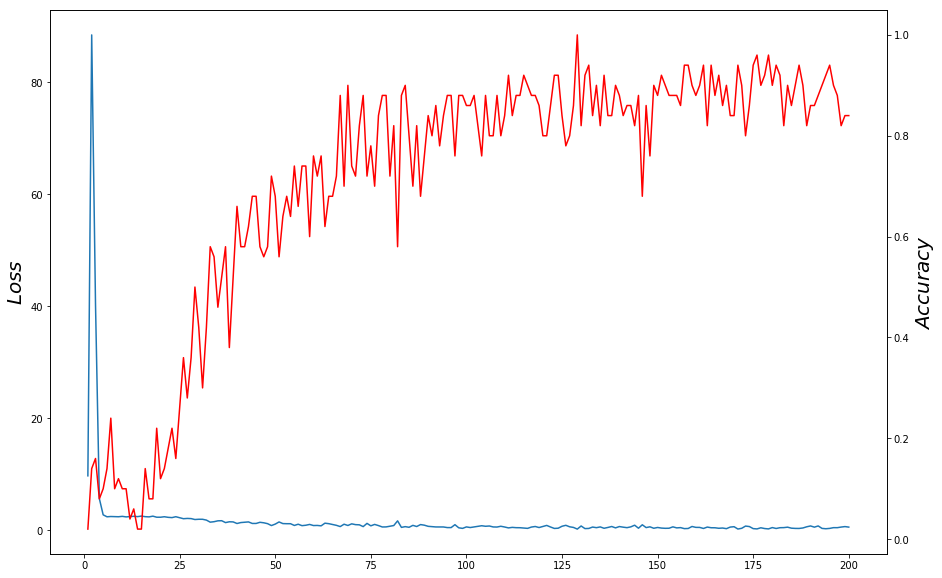

In [11]:
epoches = 200
epoches_range = [i for i in range(1,epoches+1)]

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(111)
ax1.plot(epoches_range, loss_hist)
ax1.set_ylabel('$Loss$',fontsize=20, )
ax2 = ax1.twinx()
ax2.plot(epoches_range, accuracy_hist,'r')
ax2.set_ylabel('$Accuracy$', fontsize=20)
# plt.plot(loss_range, loss_hist, accuracy_range, accuracy_hist)
plt.show()